In [1]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import sys
sys.path.append('../utils')
from helper_functions import combine_zip_codes_and_county_geos, ev_adoption_rate

In [2]:
zip_code_path = "../geojsons/California_Zip_Codes.geojson"
counties_path = "../geojsons/California_County_Boundaries.geojson"
gdf = combine_zip_codes_and_county_geos(zip_code_path, counties_path)

Reading in geojson files...
California has 1721 zip codes and 69 counties
Our join lost us 4 zip codes out of 1721


In [3]:
summary_2018 = ev_adoption_rate('../vehicle_data/vehicle-fuel-type-count-by-zip-code.csv', 2018)

Total number of new vehicles for 2018: 4071718



In [4]:
summary_2020 = ev_adoption_rate('../vehicle_data/vehicle-count-as-of-1-1-2020.csv', 2020)

Total number of new vehicles for 2020: 4268416



In [5]:
summary_2021 = ev_adoption_rate('../vehicle_data/vehicle-fuel-type-count-by-zip-code-2021.csv', 2021)

Total number of new vehicles for 2021: 3653752



In [6]:
summary_2022 = ev_adoption_rate('../vehicle_data/vehicle-fuel-type-count-by-zip-code-2022.csv', 2022)

Total number of new vehicles for 2022: 3585538



In [7]:
summary_2018

,Fuel,Pct New Vehicles Registered,Date
0,Fuel,94.785788,2018-10-01
1,Hybrid,2.491209,2018-10-01
2,ZEV,2.723003,2018-10-01


In [8]:
summary_2022

,Fuel,Pct New Vehicles Registered,Date
0,Fuel,90.419067,2022-01-01
1,Hybrid,2.316472,2022-01-01
2,ZEV,7.264461,2022-01-01


In [9]:
df_final = pd.concat([summary_2018, summary_2020, summary_2021, summary_2022])

In [10]:
df_final

,Fuel,Pct New Vehicles Registered,Date
0,Fuel,94.785788,2018-10-01
1,Hybrid,2.491209,2018-10-01
2,ZEV,2.723003,2018-10-01
0,Fuel,93.429553,2020-01-01
1,Hybrid,2.375331,2020-01-01
2,ZEV,4.195116,2020-01-01
0,Fuel,93.361317,2021-01-01
1,Hybrid,1.941292,2021-01-01
2,ZEV,4.697391,2021-01-01
0,Fuel,90.419067,2022-01-01


In [11]:
evs_only = df_final[df_final['Fuel'] != 'Fuel']
evs_overall = evs_only.groupby('Date')['Pct New Vehicles Registered'].sum()
hybrids = evs_only[evs_only['Fuel'] == 'Hybrid'].groupby('Date')['Pct New Vehicles Registered'].sum()
ZEVs = evs_only[evs_only['Fuel'] == 'ZEV'].groupby('Date')['Pct New Vehicles Registered'].sum()

In [12]:
# Create target horizonal line as PD.dataframe
curr_date = date(2019, 1, 1)
years_list = [date(2018, 10, 1), curr_date]
for i in range(7):
    curr_date = curr_date + relativedelta(years=1)
    years_list.append(curr_date)

goal = pd.Series([35.0 for x in range(len(years_list))], index = years_list)

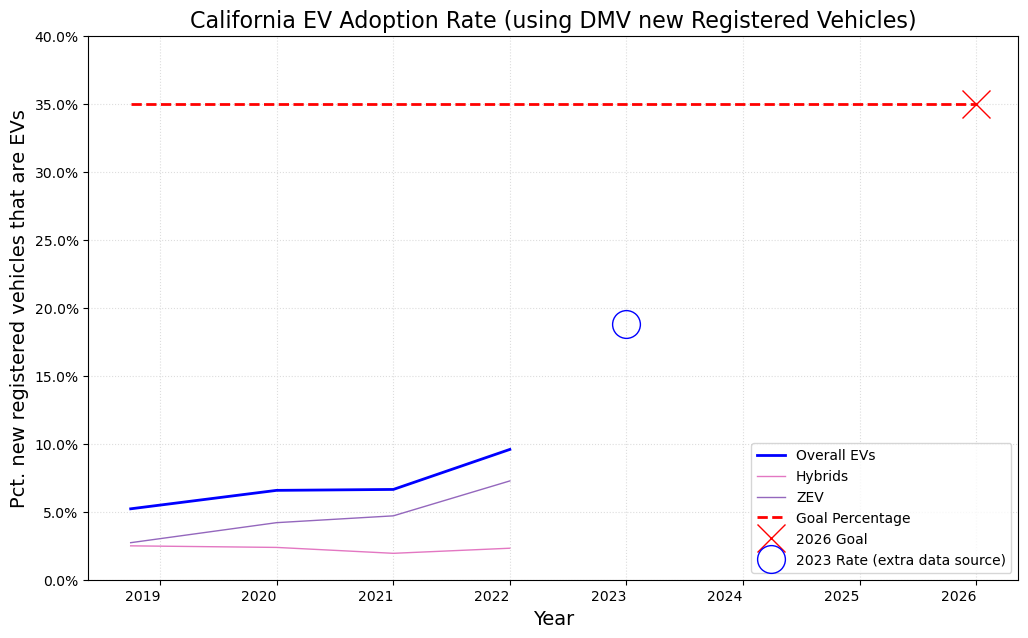

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylabel('Pct. new registered vehicles that are EVs', fontsize = 14)
ax.set_ylim([0, 40])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
ax.set_title('California EV Adoption Rate (using DMV new Registered Vehicles)', fontsize = 16)

evs_overall.plot(kind = 'line', 
                 label = 'Overall EVs',
                 color = 'b',
                 linewidth = 2,
                 ax=ax)

hybrids.plot(kind = 'line', 
                 label = 'Hybrids',
                 color = 'tab:pink',
                 linewidth = 1,
                 ax=ax)

ZEVs.plot(kind = 'line', 
                 label = 'ZEV',
                 color = 'tab:purple',
                 linewidth = 1,
                 ax=ax)

goal.plot(kind = 'line', 
          label = 'Goal Percentage',
          color = 'r', 
          linestyle = 'dashed',
          linewidth = 2,
          ax = ax)

ax.plot(date(2026, 1, 1), 35.0, 'rx', mfc='none', markersize = 20, label='2026 Goal') 
ax.plot(date(2023, 1, 1), 18.8, 'bo', mfc='none', markersize = 20, label='2023 Rate (extra data source)') 
ax.set_xlabel('Year', fontsize = 14)
ax.legend(loc = 'lower right')
ax.grid(color='#DDDDDD', linestyle=':', linewidth=0.8)

In [ ]:
fig.savefig('../pics/overall_ev_progress.png')
plt.close(fig)

In [17]:
evs_overall

Date
2018-10-01    5.214212
2020-01-01    6.570447
2021-01-01    6.638683
2022-01-01    9.580933
Name: Pct New Vehicles Registered, dtype: float64